In [2]:
import nltk 
import re # regular expression
from nltk.corpus import wordnet # dicionario lexico

## Algumas operações com Python para dados do tipo texto

In [1]:
frase = 'Python eh uma linguagem fenomenal'; frase

'Python eh uma linguagem fenomenal'

In [3]:
frase2 = ' para qualquer cientista de dados'

In [4]:
frase + frase2

'Python eh uma linguagem fenomenal para qualquer cientista de dados'

In [5]:
['Segunda','Terça','Quarta'] + ['Quinta','Sexta','Sábado']

['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']

In [6]:
lista = ['Segunda','Terça','Quarta']
lista.append('Quinta-feira')
lista

['Segunda', 'Terça', 'Quarta', 'Quinta-feira']

In [7]:
frase2[0:15] # slicing de string

' para qualquer '

In [10]:
print(lista);
print(lista[3:8]) 

['Segunda', 'Terça', 'Quarta', 'Quinta-feira']
['Quinta-feira']


In [11]:
len(lista)

4

### String

In [13]:
frase3 = 'Six six six the number of the Beast'
print(frase3)
frase3 = frase3.lower() # to lowercase
print(frase3)

Six six six the number of the Beast
six six six the number of the beast


In [14]:
frase3.count('six') # count the number of times that "six" is in the string

3

In [15]:
len(frase2)

33

#### Varrendo uma String

In [16]:
# Retorna o indice do inicio da palavra buscada
print(frase2)
print(frase2.index('cientista'))

 para qualquer cientista de dados
15


In [17]:
frase2[14:35]

' cientista de dados'

#### Join

In [18]:
lista = ['hot', 'dog']
'+'.join(lista)

'hot+dog'

In [19]:
'///'.join(lista)

'hot///dog'

#### Regular Expressions

In [20]:
texto = 'O numero da nossa casa 56, apto 306'
# Substitui todos os números de 0 a 9 por um espaço vazio
re.sub('[-|0-9]', ' ', texto)

'O numero da nossa casa   , apto    '

In [21]:
texto = 'O numero da nossa casa 56, apto 306'
# Substitui todos os números de 0 a 9 pela palavra "BLA"
re.sub('[-|0-9]', 'BLA', texto)

'O numero da nossa casa BLABLA, apto BLABLABLA'

In [22]:
texto = "i'm back baby!!!, Data Science ??;;;()"
new_texto = re.sub(r'[-./?!,":;()\']', ' ', texto)
new_texto

'i m back baby     Data Science        '

In [23]:
new_texto2 = re.sub(r'[-./?!,":;()\']', '', texto)
new_texto2

'im back baby Data Science '

In [24]:
new_texto.split(" ") # return a list splited by " "

['i',
 'm',
 'back',
 'baby',
 '',
 '',
 '',
 '',
 'Data',
 'Science',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

## Trabalhando com a NLTK

In [25]:
#!pip install nltk
import nltk

Caso não tenha a base de dados do NLTK faça o download do mesmo:

    - Abra o terminal
    - Abra o console Python
    - Importe a biblioteca **NLTK**
    - Execute o comando **nltk.download()**

In [26]:
frase = 'Python eh uma linguagem fenomenal'
palavras = nltk.word_tokenize(frase)
palavras

['Python', 'eh', 'uma', 'linguagem', 'fenomenal']

"word_tokenize" é um método que retorna uma lista da palavra base separada por tokens de palavras

In [27]:
from nltk import FreqDist
frequencia = FreqDist(['six', 'six', 'six', 'Iron Maiden', 'the', 'Best', 'Iron Maiden', 'forever'])
frequencia

FreqDist({'six': 3, 'Iron Maiden': 2, 'the': 1, 'Best': 1, 'forever': 1})

In [28]:
type(frequencia)

nltk.probability.FreqDist

In [29]:
print(frequencia.values())

dict_values([3, 2, 1, 1, 1])


In [32]:
print(frequencia.keys())

dict_keys(['six', 'Iron Maiden', 'the', 'Best', 'forever'])


In [30]:
frequencia.max()

'six'

In [31]:
frequencia.items()

dict_items([('six', 3), ('Iron Maiden', 2), ('the', 1), ('Best', 1), ('forever', 1)])

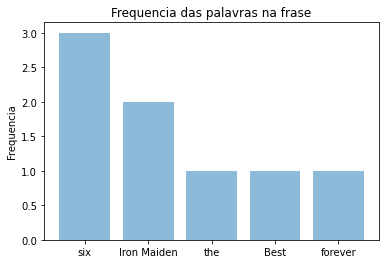

In [33]:
# plot da Frequencia das palavras na Frase
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

palavras = frequencia.keys()
y_pos = np.arange(len(palavras))
contagem = frequencia.values()

# matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
plt.bar(y_pos, contagem, align='center', alpha=0.5)
plt.xticks(y_pos, palavras)
plt.ylabel('Frequencia')
plt.title('Frequencia das palavras na frase')

plt.show()

## Pre Processing

### Steming

* Reduz a palavra na sua forma radical
* Usado para fazer pré-processamento de dados

In [34]:
# Stemming em Portugues
stemmer = nltk.stem.RSLPStemmer()

In [35]:
stemmer.stem('Trabalhou')

'trabalh'

In [36]:
stemmer.stem('Trabalhava')

'trabalh'

In [37]:
stemmer.stem('Trabalha')

'trabalh'

In [16]:
stemmer.stem('Carro
             ')

'carr'

In [38]:
stemmer.stem('correu')

'corr'

In [39]:
stemmer.stem('corrida')

'corr'

In [40]:
# Stemming em Ingles
stemmer = nltk.stem.SnowballStemmer("english")

In [41]:
stemmer.stem('running')

'run'

In [42]:
stemmer.stem('run')

'run'

In [43]:
stemmer.stem('have')

'have'

In [44]:
stemmer.stem('having')

'have'

In [45]:
# Função para aplicar Stemming
def Stemming(frase):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    
    for w in frase.split():
        palavras.append(stemmer.stem(w))
        
    return (" ".join(palavras))

In [46]:
Stemming('Ele trabalhava frequentemente no projeto de criacao de novos produtos')

'ele trabalh frequ no projet de criaca de nov produt'

### Lemmatization

    - Desflexiona uma palavra para determinar o seu 'Lemma'
    - Técnica usada para fazer pré-processamento de dados.

In [47]:
from nltk.stem import WordNetLemmatizer

In [48]:
lemmatizer = WordNetLemmatizer()

In [49]:
print(lemmatizer.lemmatize("cats"))

cat


In [53]:
print(lemmatizer.lemmatize("lions"))

lion


In [54]:
# Busca um lemma para 'is' do tipo verbo
lemmatizer.lemmatize('is', pos='v') # pos = part of speech

'be'

In [55]:
lemmatizer.lemmatize('are', pos='v')

'be'

In [56]:
# Busca um adjetivo para 'better'
print(lemmatizer.lemmatize("better", pos="a"))

good


In [57]:
print(lemmatizer.lemmatize("best", pos="a"))

best


In [58]:
print(lemmatizer.lemmatize("running", pos="n")) # substantivo

running


In [59]:
print(lemmatizer.lemmatize("running", pos="v")) # verbo

run


In [60]:
print(lemmatizer.lemmatize("running", pos="a")) # adjetivo

running


### Stopwords

* Palavras ou termos que são muito usadas mas normalmente não tem nenhum significado, como artigos: 'é', 'o', 'a', etc
* Técnica usada para pré-processamento de dados

In [61]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [62]:
stopwords

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [63]:
def RemoveStopWords(frase):
    frase = frase.lower()
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    
    palavras = [i for i in frase.split() if i not in stopwords]
    
    print("Lista de palavras sem as 'stopwords':\n", palavras)
    
    return (" ".join(palavras))

In [64]:
sentenca1 = 'Ola mundo, estou trabalhando com textos com o artigo do minerando dados. Cá estamos nós mais uma noite estudando!'

In [65]:
RemoveStopWords(sentenca1)

Lista de palavras sem as 'stopwords':
 ['ola', 'mundo,', 'trabalhando', 'textos', 'artigo', 'minerando', 'dados.', 'cá', 'noite', 'estudando!']


'ola mundo, trabalhando textos artigo minerando dados. cá noite estudando!'

In [66]:
sentenca2 = 'Seu trabalho de NLP será super interessante com as aulas de Mineração de Textos'

In [67]:
RemoveStopWords(sentenca2)

Lista de palavras sem as 'stopwords':
 ['trabalho', 'nlp', 'super', 'interessante', 'aulas', 'mineração', 'textos']


'trabalho nlp super interessante aulas mineração textos'

**Importante!!!**: Use com moderação e sempre teste os resultados.

### Part of Speech ("pos_tag")

    - Part of Speech: Na tardução literal seria: *Partes da Fala*.
    - Consistem em identificar a **função gramatical** das palavras em um texto.
    - A função gramatical muda conforme é empregada a palavra no texto.

In [68]:
text = nltk.word_tokenize('O blog Minerando Dados é muito bom')
text

['O', 'blog', 'Minerando', 'Dados', 'é', 'muito', 'bom']

In [70]:
nltk.pos_tag(text) # Retorna a classificação de cada termo da frase

# https://www.nltk.org/book/ch05.html

[('O', 'NNP'),
 ('blog', 'NN'),
 ('Minerando', 'NNP'),
 ('Dados', 'NNP'),
 ('é', 'NNP'),
 ('muito', 'NN'),
 ('bom', 'NN')]

In [71]:
text = nltk.word_tokenize('João Comprou um presente muito legal')
nltk.pos_tag(text)

[('João', 'NNP'),
 ('Comprou', 'NNP'),
 ('um', 'JJ'),
 ('presente', 'NN'),
 ('muito', 'FW'),
 ('legal', 'JJ')]

In [72]:
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


In [73]:
nltk.help.upenn_tagset('JJ')

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


In [74]:
nltk.help.upenn_tagset('N')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [75]:
nltk.help.upenn_tagset('VB')

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [76]:
nltk.help.upenn_tagset('DT')

DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


In [79]:
text = nltk.word_tokenize('John Bought a Very Nice Gift')
nltk.pos_tag(text)

# part of speech works better in english

[('John', 'NNP'),
 ('Bought', 'NNP'),
 ('a', 'DT'),
 ('Very', 'NNP'),
 ('Nice', 'NNP'),
 ('Gift', 'NNP')]

In [80]:
text = nltk.word_tokenize("My print is very good")
nltk.pos_tag(text)

[('My', 'PRP$'),
 ('print', 'NN'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('good', 'JJ')]

In [81]:
nltk.help.upenn_tagset('PRP$')

PRP$: pronoun, possessive
    her his mine my our ours their thy your


In [82]:
text = nltk.word_tokenize("Hi, my name is Leonardo, I want to print the outstanding invoice")
nltk.pos_tag(text)

[('Hi', 'NNP'),
 (',', ','),
 ('my', 'PRP$'),
 ('name', 'NN'),
 ('is', 'VBZ'),
 ('Leonardo', 'NNP'),
 (',', ','),
 ('I', 'PRP'),
 ('want', 'VBP'),
 ('to', 'TO'),
 ('print', 'VB'),
 ('the', 'DT'),
 ('outstanding', 'JJ'),
 ('invoice', 'NN')]

* Part of Speech é uma técnica dificil devido as funções gramaticais de cada idioma.
* Existem projetos que utilizam Machine Learning para implementar POS.

## Trabalhando com Wordnet

* O Wordnet é um grande banco de dados léxico de substantivos, verbos, adjetivos e advérbios.
* Essas palavras são agrupadas em conjuntos de sinônimos, cada um expressando um **conceito distinto**.
* Os sinônimos são interligados pelo seu significado semântico conceitual e suas relações léxicas.
* O Wordnet é uma grande rede de **conceitos interligados** e é amplamente utilizada em pesquisas no mundo todo.
* O NLTK contém uma interface de acesso ao Wordnet.

**Obs:** 
* Existem diversas variações do Wordnet para outros idiomas. 
* Para português ainda existem poucas iniciativas

In [83]:
from nltk.corpus import wordnet

In [85]:
# Consulta um sinônimo para a palavra '*bike*'
wordnet.synsets('bike') # Retorna os sinonimos da palavra passada

[Synset('motorcycle.n.01'), Synset('bicycle.n.01'), Synset('bicycle.v.01')]

In [86]:
# Definicoes da palavra 'bike'
wordnet.synset('bicycle.n.01').definition()

'a wheeled vehicle that has two wheels and is moved by foot pedals'

In [ ]:
# " veículo de rodas que tem duas rodas e é movido por pedais"

In [87]:
wordnet.synset('motorcycle.n.01').definition()

'a motor vehicle with two wheels and a strong frame'

In [ ]:
# " veículo a motor com duas rodas e um quadro forte"

### Consulta hierarquia de termos

Hiperônimo ou hiperónimo é uma palavra que pertence ao mesmo campo semântico de outra mas com o sentido mais abrangente, podendo ter várias possibilidades para um único hipônimo.

In [88]:
# Hiponimos da palavra 'bicycle'.
# Conceitos mais especificos
wordnet.synset('bicycle.n.01').hyponyms()

[Synset('bicycle-built-for-two.n.01'),
 Synset('mountain_bike.n.01'),
 Synset('ordinary.n.04'),
 Synset('push-bike.n.01'),
 Synset('safety_bicycle.n.01'),
 Synset('velocipede.n.01')]

In [90]:
# Hiperonimos da palavra 'bicycle'
# Conceitos mais genericos
wordnet.synset('bicycle.n.01').hypernyms()

[Synset('wheeled_vehicle.n.01')]

In [91]:
# Meronyms da palavra 'bicycle'
# Conceitos partes de outros conceitos
wordnet.synset('bicycle.n.01').part_meronyms() # Partes de um conceito

[Synset('bicycle_seat.n.01'),
 Synset('bicycle_wheel.n.01'),
 Synset('chain.n.03'),
 Synset('coaster_brake.n.01'),
 Synset('handlebar.n.01'),
 Synset('kickstand.n.01'),
 Synset('mudguard.n.01'),
 Synset('pedal.n.02'),
 Synset('sprocket.n.02')]